# Inverse transform sampling.
###### See https://en.wikipedia.org/wiki/Inverse_transform_sampling

In [1]:
%pylab inline
import numpy as np
from scipy import interpolate
N=10000 #precision of the integral approximation
Ninv=1000 #precision of the integral approximation

Populating the interactive namespace from numpy and matplotlib


## Some example of Probability Density Function PDF(x)
#### Note: In this context they are defined in the interval x=[0,1] and for semplicity the normalization is performed afterwards.

#### pdfExample1_single is an example of unusual PDF

In [46]:
def pdfExample1_single(x):
    if x<0.5:
        return x
    if x>=0.5:
        return x**2
pdfExample1=np.vectorize(pdfExample1_single)

#### pdfNormalDistribution is an example of a gaussian distribution PDF

In [48]:
def pdfNormalDistribution(x,sigma=.1,x0=0.5):
    return 1./(sigma*np.sqrt(2*pi))*np.exp(-0.5*((x-x0)/sigma)**2)

#### Here I define the PDF that I want to use as "myPDF"

In [49]:
myPDF=pdfExample1
#myPDF=pdfNormalDistribution

#### Definition of the function for normalize the PDF to integral[0,1]=1

In [58]:
def normalizePDF(myFunc):
    TotalIntegral=np.trapz(myFunc(linspace(0,1,N)),linspace(0,1,N))
    def normalizedPDF(x):
        return myFunc(x)/TotalIntegral
    return normalizedPDF

#### Calculation of "pdf" as the normalized "myPDF"

In [51]:
pdf=normalizePDF(myPDF)

##### Plot the PDF as is

Text(0, 0.5, 'Prob. Density (non-normalized)')

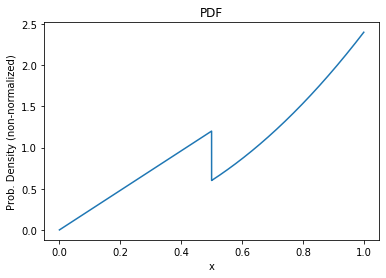

In [59]:
x=linspace(0,1,N)
plot(x,pdf(x))
title("PDF")
xlabel("x")
ylabel("Prob. Density (non-normalized)")


#### Calculation of the Cumulative Density Function (normalized) and interpolation of its inverse, inv_cdf

In [60]:
def cdf_single(x):
    return np.trapz(pdf(linspace(0,x,N)),linspace(0,x,N))
    
cdf_nonNormalized=np.vectorize(cdf_single)

def cdf(x):
    return cdf_nonNormalized(x)/cdf_nonNormalized(1)

def normalizeCDF(myFunc):
    TotalIntegral=np.trapz(myFunc(linspace(0,1,N)),linspace(0,1,N))
    def normalizedCDF(x):
        return myFunc(x)/TotalIntegral
    return normalizedPDF

xxx=linspace(0,1,Ninv)
inv_cdf = interpolate.interp1d(cdf(xxx),xxx,kind='linear')





#### Plot of the CDF and its inverse

Text(0.5, 0, 'Comulative Prob. Density (normalized)')

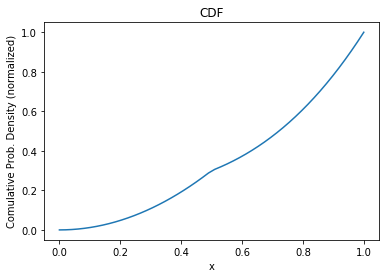

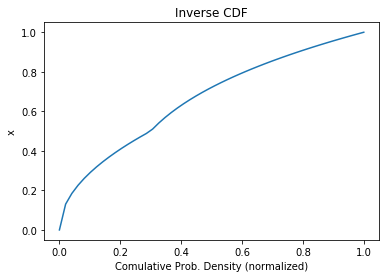

In [61]:
x=linspace(0,1)
plot(x,cdf(x))
title("CDF")
xlabel("x")
ylabel("Comulative Prob. Density (normalized)")
figure()
plot(x,inv_cdf(x))
title("Inverse CDF")
ylabel("x")
xlabel("Comulative Prob. Density (normalized)")

### Calculate random numbers in [0,1] (flat density)

In [62]:
samples=60000
randomVariable=np.random.rand(samples) 

## Calculate the samples through the inverse CDF

In [63]:
samples=inv_cdf(randomVariable)

### The histogram of N samples following the desidered PDF

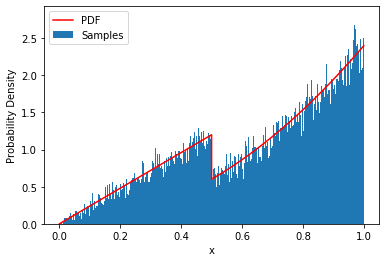

In [64]:
h=hist(samples,bins=1000, density=True, label="Samples")
x=linspace(0,1,N)
plot(x,pdf(x),"r",label="PDF")
xlabel("x")
ylabel("Probability Density")
legend()
